# Jane Chinwuko
# Batch number: DS2307

#### Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

#### Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
#### Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


# This project is a Classification(binary) problem.


In [1]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
#Load our training and testing data
term_deposit_train = pd.read_csv('termdeposit_train.csv')
term_deposit_test = pd.read_csv('termdeposit_test.csv')

## Exploratory Data Analysis

In [3]:
#display of our training dataset
term_deposit_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


We can see we both categorical and numerical variables in our datasets.

In [4]:
#display of our training dataset
term_deposit_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
# Viewing the dimensions of our train and test data
term_deposit_train.shape, term_deposit_test.shape

((31647, 18), (13564, 17))

we have 31,647 rows and 18 columns in our training dataset. In our testing dataset, we have 13,564 rows and 17 columns. We have 17 columns in our test dataset because our target variable (subscribed) is not included.

In [6]:
#Viewing the columns present in our training dataset
term_deposit_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

We have 18 columns in our training data

In [7]:
#Viewing the columns present in our testing dataset
term_deposit_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

We have 17 columns in our testing data. The target variable is not included here.

In [8]:
#Displays the basic information about the columns in our training dataset
term_deposit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


We have 8 columns that are of int64 datatype and 10 object datatype in our training dataset

In [9]:
#Displays the basic information about the columns in our testing dataset
term_deposit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


We have 8 columns that are of int64 datatype and 9 object datatype in our training dataset

In [10]:
#Generating the descriptive statistics of the numerical variable in our training dataset
term_deposit_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


We have equal counts(31647) of the data in our train. This means no missing values in our dataset.

In [11]:
#Generating the descriptive statistics of the numerical variable in our testing dataset
term_deposit_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


We have equal counts(13564) of the data in our test. This means no missing values in our dataset.

In [12]:
#displaying the descriptive statistics of our categorical variables in train
term_deposit_train.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,31647,31647,31647,31647,31647,31647,31647,31647,31647,31647
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,6842,19095,16224,31062,17584,26516,20423,9669,25929,27932


In [13]:
#displaying the descriptive statistics of our categorical variables in test
term_deposit_test.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,13564,13564,13564,13564,13564,13564,13564,13564,13564
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,2890,8119,6978,13334,7546,11451,8862,4097,11030


In [14]:
#checking missing values in our train and test data
train_missing_values = pd.DataFrame(term_deposit_train.isnull().sum(), columns = ['Train'])
test_missing_values = pd.DataFrame(term_deposit_test.isnull().sum(), columns = ['Test'])
missing_values = pd.concat([train_missing_values, test_missing_values], axis = 1)
missing_values.T

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
Train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


we can see that there are no missing values in both train and test dataset

In [15]:
#Displays the unique value for subscribed
term_deposit_train['subscribed'].nunique()

2

There are 2 unique occurences of the values in the target variable. This is a binary classification problem because we have two labels (yes or no).

In [16]:
#This returns the count of unique occurrences in the subscribed column before categorizing into binary.
term_deposit_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

We have 27,932 no value and 3,715 yes values.

In [17]:
# Printing the total number of duplicates across all the columns in our training dataset
duplicated = term_deposit_train.duplicated()

print("The number of duplicates in our training dataset is:", term_deposit_train.duplicated().sum())

The number of duplicates in our training dataset is: 0


No duplicate records in our training dataset

In [18]:
# Printing the total number of duplicates across all the columns in our testing dataset
duplicated = term_deposit_test.duplicated()

print("The number of duplicates in our testing dataset is:", term_deposit_test.duplicated().sum())

The number of duplicates in our testing dataset is: 0


No duplicate records in our testing dataset

In [19]:
#This returns the count of unique occurrences in the subscribed column.
term_deposit_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

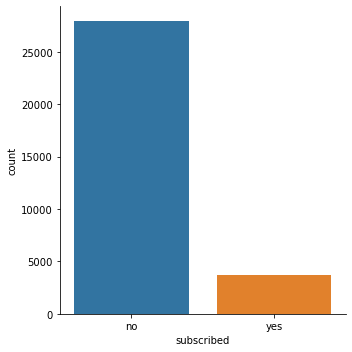

In [20]:
# This catplot shows the distribution of subscribed column.
sns.catplot(x ='subscribed', data = term_deposit_train, kind = 'count')

These are the value counts of the unique occurrences of the subscribed variable. Out of the 31647 clients, only 3715 subscribed for a term deposit. 
Our target variable(subscribed) is a binary categorization as we have either a yes or a no value. The count is not balance. We shall be using the SMOTE algorithms to balance the column before building our model.

In [21]:
#Display of the unique occurences of our job column for train and test
unique_names = list(term_deposit_train['job'].unique())
train_list = list(term_deposit_train['job'])
test_list = list(term_deposit_test['job'])
train_dict = {}
test_dict = {}
for name in unique_names:
    train_dict[name] = train_list.count(name)
    test_dict[name] = test_list.count(name)


d = {'Train' : train_dict, 'Test' : test_dict} 
df = pd.DataFrame(d)
df.T

,admin.,unknown,services,management,technician,retired,blue-collar,housemaid,self-employed,student,entrepreneur,unemployed
Train,3631,206,2903,6639,5307,1574,6842,874,1123,635,1008,905
Test,1540,82,1251,2819,2290,690,2890,366,456,303,479,398


In both the train and test dataset, we have more clients in the blue-collar job category.

<function matplotlib.pyplot.show(close=None, block=None)>

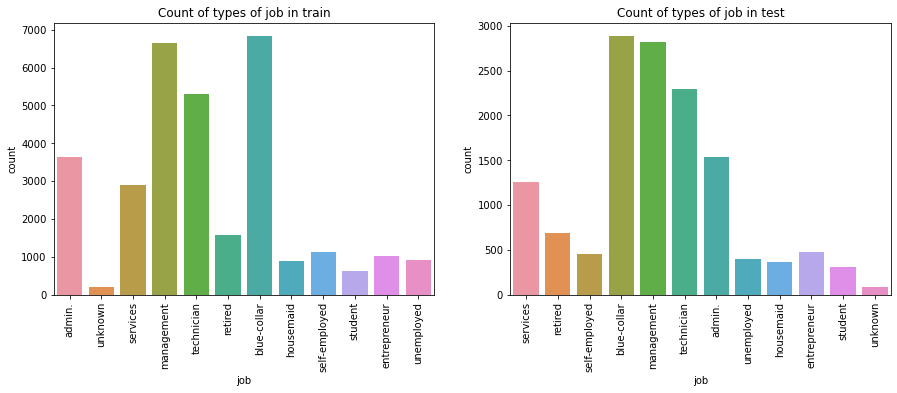

In [22]:
# countplot showing the types of job the clients do in train data
f, ax = plt.subplots(1,2, figsize = (15,5))


sns.countplot(x ='job', data = term_deposit_train,  ax = ax[0])
ax[0].set_title('Count of types of job in train')
ax[0].tick_params(axis='x', rotation = 90)

# countplot showing the types of job the clients do in test data
sns.countplot(x ='job', data = term_deposit_test,  ax = ax[1])
ax[1].set_title('Count of types of job in test')
ax[1].tick_params(axis='x', rotation = 90)
plt.show

From the above count and plot, we can see that most of the clients work in the blue-collar job followed by the management job and thirdly technician job.

In [23]:
#This returns the count of unique occurrences in the marital column.
term_deposit_train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [24]:
#This returns the count of unique occurrences in the marital column.
term_deposit_test['marital'].value_counts()

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

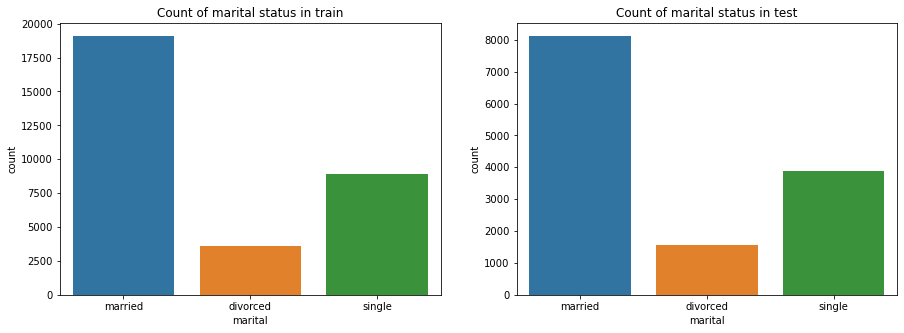

In [25]:
# countplot showing the marital status of the clients in train data
f, ax = plt.subplots(1,2, figsize = (15,5))

sns.countplot(x ='marital', data = term_deposit_train,  ax = ax[0])
ax[0].set_title('Count of marital status in train')

# countplot showing the marital status of the clients in test data
sns.countplot(x ='marital', data = term_deposit_test,  ax = ax[1])
ax[1].set_title('Count of marital status in test')
plt.show

Most of the clients are married. We have few clients that are divorced.

In [26]:
#This returns the count of unique occurrences in the education column.
term_deposit_train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [27]:
#This returns the count of unique occurrences in the education column.
term_deposit_test['education'].value_counts()

secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

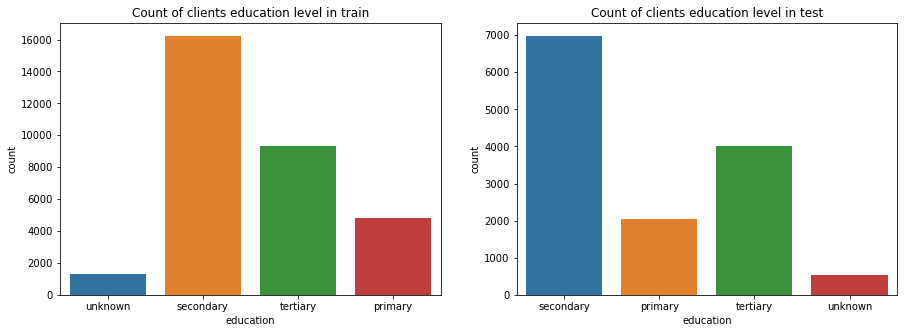

In [28]:
# countplot showing the clients education level in train data
f, ax = plt.subplots(1,2, figsize = (15,5))

sns.countplot(x ='education', data = term_deposit_train,  ax = ax[0])
ax[0].set_title('Count of clients education level in train')

# countplot showing the clients education level in test data
sns.countplot(x ='education', data = term_deposit_test,  ax = ax[1])
ax[1].set_title('Count of clients education level in test')
plt.show

Most clients completed their secondary education.

In [29]:
#This returns the count of unique occurrences in the loan column.
term_deposit_train['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

In [30]:
#This returns the count of unique occurrences in the loan column.
term_deposit_test['loan'].value_counts()

no     11451
yes     2113
Name: loan, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

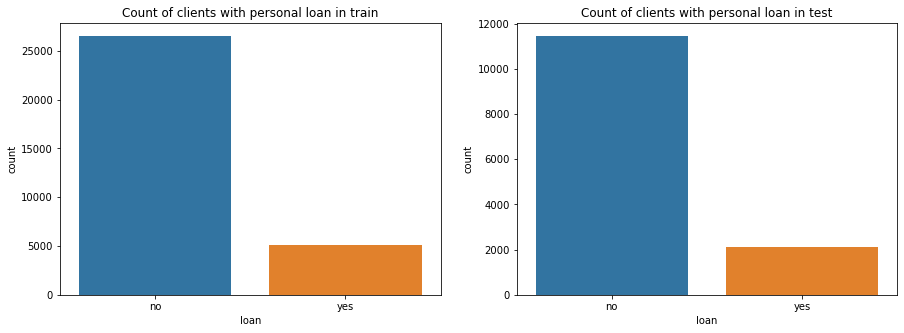

In [31]:
# countplot showing the clients with personal loan from train data
f, ax = plt.subplots(1,2, figsize = (15,5))

sns.countplot(x ='loan', data = term_deposit_train,  ax = ax[0])
ax[0].set_title('Count of clients with personal loan in train')

# countplot showing the clients with personal loan from our test data
sns.countplot(x ='loan', data = term_deposit_test,  ax = ax[1])
ax[1].set_title('Count of clients with personal loan in test')
plt.show

Most of the clients do not have personal loan.

In [32]:
#This returns the count of unique occurrences in the housing column.
term_deposit_train['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

In [33]:
#This returns the count of unique occurrences in the housing column.
term_deposit_test['housing'].value_counts()

yes    7546
no     6018
Name: housing, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

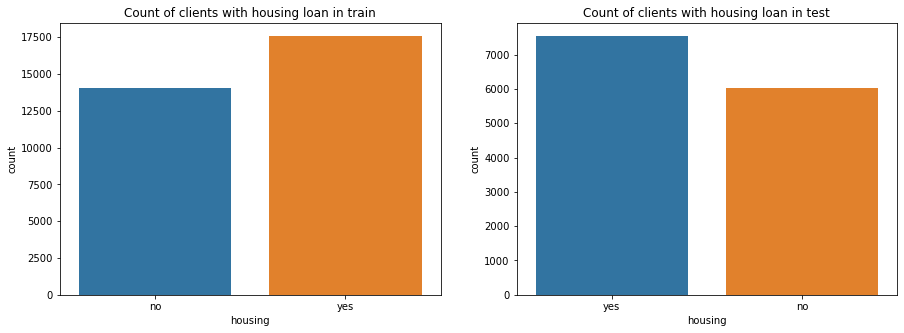

In [34]:
# countplot showing the clients with housing loan in train data
f, ax = plt.subplots(1,2, figsize = (15,5))

sns.countplot(x ='housing', data = term_deposit_train,  ax = ax[0])
ax[0].set_title('Count of clients with housing loan in train')

# countplot showing the clients with housing loan in test data
sns.countplot(x ='housing', data = term_deposit_test,  ax = ax[1])
ax[1].set_title('Count of clients with housing loan in test')
plt.show

Most of the clients have housing loan.

In [35]:
#This returns the count of unique occurrences in the contact column for train.
term_deposit_train['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [36]:
#This returns the count of unique occurrences in the contact column for test.
term_deposit_test['contact'].value_counts()

cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

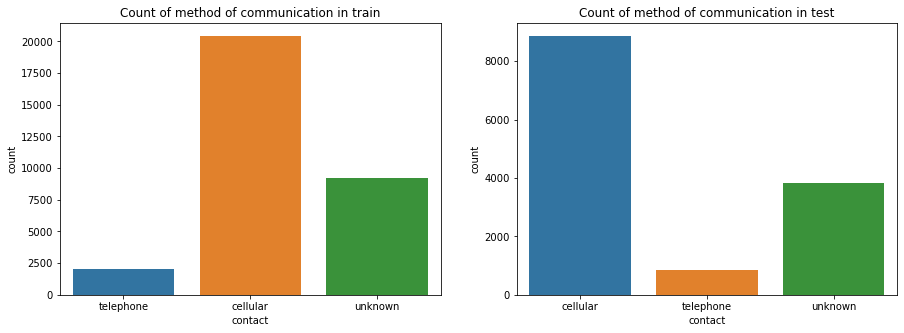

In [37]:
# countplot showing the method by which the clients were communicated in train data
f, ax = plt.subplots(1,2, figsize = (15,5))

sns.countplot(x ='contact', data = term_deposit_train,  ax = ax[0])
ax[0].set_title('Count of method of communication in train')

# countplot showing the method by which the clients were communicated in test data
sns.countplot(x ='contact', data = term_deposit_test,  ax = ax[1])
ax[1].set_title('Count of method of communication in test')
plt.show

Most of the clients were communicated using the cellular.

C:\Users\Omen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution of the clients')

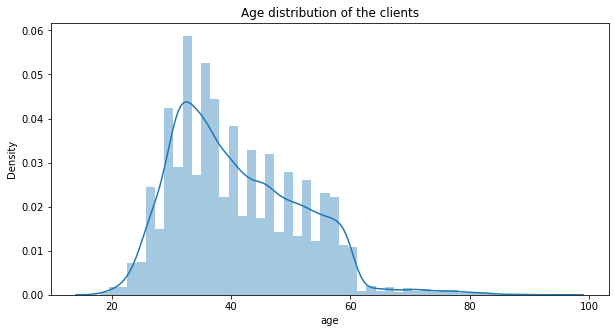

In [38]:
#Distribution plot of the age column in our train
plt.figure(figsize=[10,5])
sns.distplot(term_deposit_train['age']);
plt.title('Age distribution of the clients')

We can see from the districution plot that most of the clients are between the age of 20 and 60.

In [39]:
# Grouping of job category by subscription
term_deposit_train.groupby(['subscribed', 'job']).size()

subscribed  job          
no          admin.           3179
            blue-collar      6353
            entrepreneur      923
            housemaid         795
            management       5716
            retired          1212
            self-employed     983
            services         2649
            student           453
            technician       4713
            unemployed        776
            unknown           180
yes         admin.            452
            blue-collar       489
            entrepreneur       85
            housemaid          79
            management        923
            retired           362
            self-employed     140
            services          254
            student           182
            technician        594
            unemployed        129
            unknown            26
dtype: int64

Clients in the Management job category are more likely to subscribe for term deposit. 
The highest number of clients not likely to subscribe for the term deposit are in the blue-collar job category.

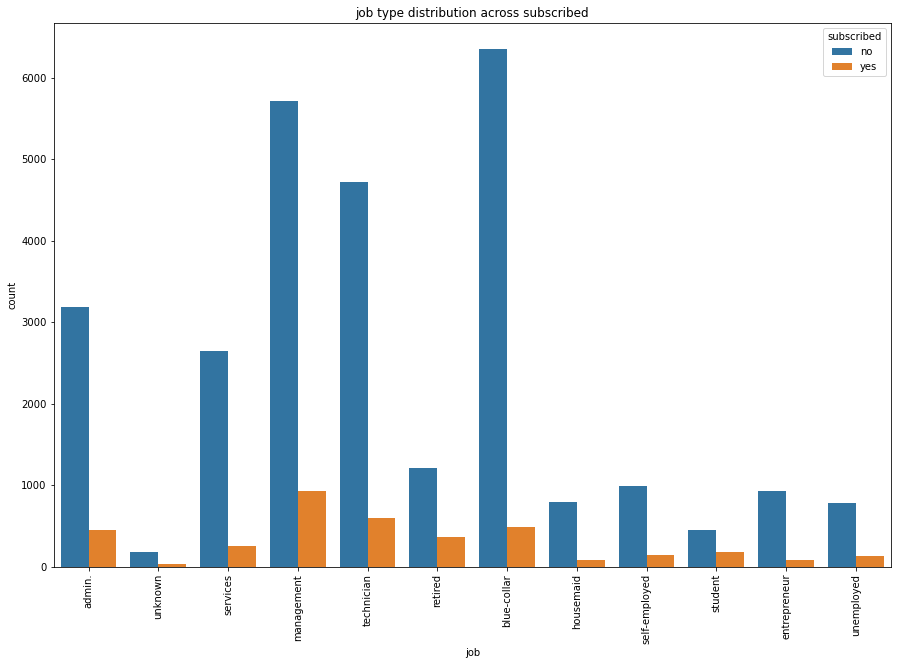

In [40]:
# countplot showing the ports the passengers(survived or did not survive) boarded from
plt.figure(figsize=[15,10])
sns.countplot(x='job', hue='subscribed', data=term_deposit_train)
plt.title('job type distribution across subscribed')
plt.xticks(rotation = 90)
plt.show()

We can see that clients in the management job category subscribed more than others.

In [41]:
# Grouping of marital category by subscription
term_deposit_train.groupby(['subscribed', 'marital']).size()

subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
            married      1919
            single       1351
dtype: int64

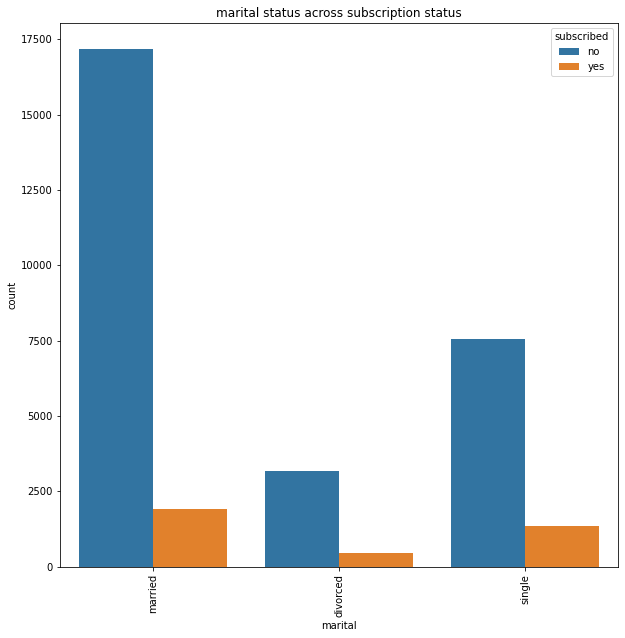

In [42]:
# countplot showing the ports the passengers(survived or did not survive) boarded from
plt.figure(figsize=[10,10])
sns.countplot(x='marital', hue='subscribed', data=term_deposit_train)
plt.title('marital status across subscription status')
plt.xticks(rotation = 90)
plt.show()

From the above, we can see that many married clients did not subscribe for a term deposit.

In [43]:
# Grouping of education category by subscription
term_deposit_train.groupby(['subscribed', 'education']).size()

subscribed  education
no          primary       4381
            secondary    14527
            tertiary      7886
            unknown       1138
yes         primary        427
            secondary     1697
            tertiary      1415
            unknown        176
dtype: int64

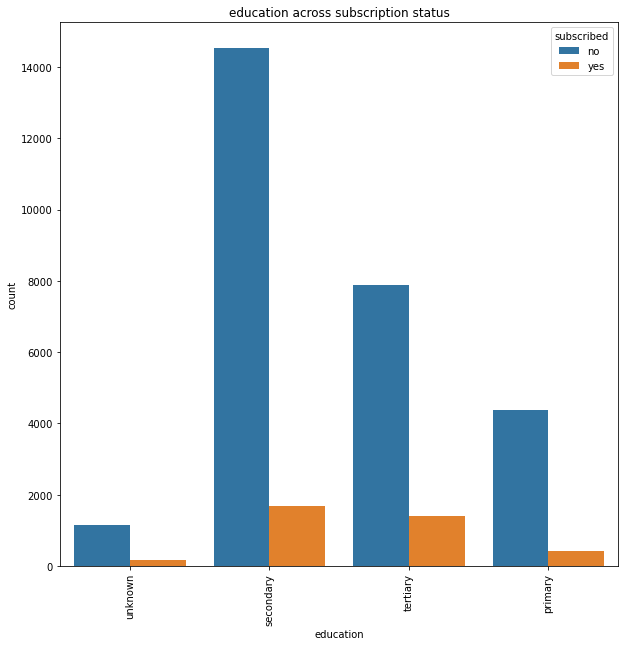

In [44]:
# countplot showing the ports the passengers(survived or did not survive) boarded from
plt.figure(figsize=[10,10])
sns.countplot(x='education', hue='subscribed', data=term_deposit_train)
plt.title('education across subscription status')
plt.xticks(rotation = 90)
plt.show()

Most of the clients that subscribed for a term deposit completed secondary education.

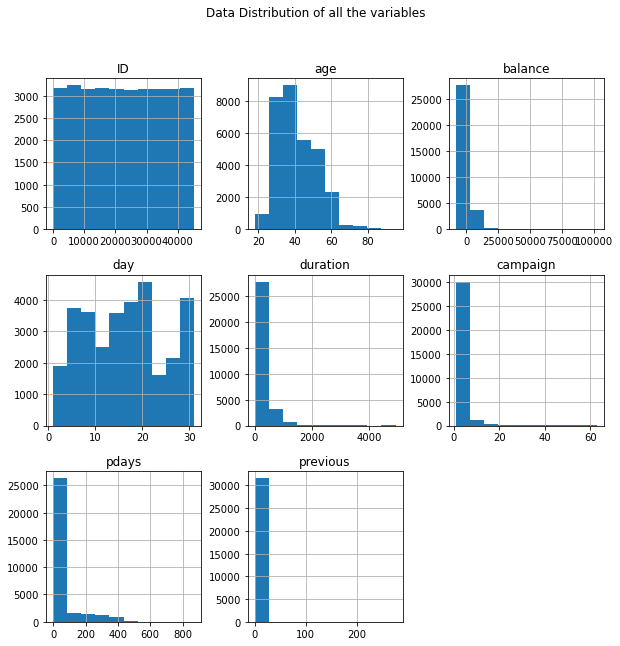

In [45]:
# Histogram containing all the Numerical columns
term_deposit_train.hist(bins=10, figsize=(10,10))
plt.suptitle("Data Distribution of all the variables")
plt.show()

We can see from the distribution that day and age are almost normally distributed. Others are skewed to the right.

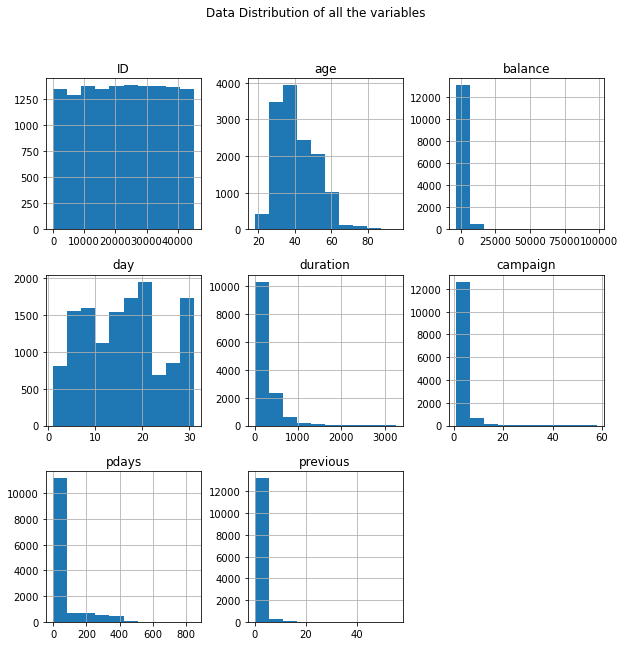

In [46]:
# Histogram containing all the Numerical columns
term_deposit_test.hist(bins=10, figsize=(10,10))
plt.suptitle("Data Distribution of all the variables")
plt.show()

In [47]:
#converting our subscribed column from categorical to numerical variable
term_deposit_train['subscribed'].replace('no', 0, inplace = True)
term_deposit_train['subscribed'].replace('yes', 1, inplace = True)

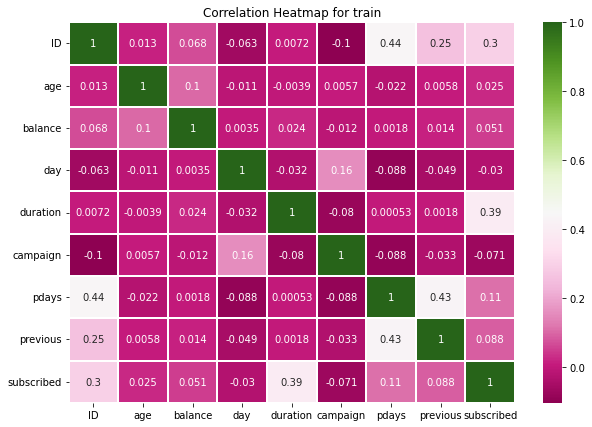

In [48]:
# Using heatmap to visualize the correlation between the numerical features in our training dataset.
plt.figure(figsize=(10,7))
sns.heatmap(term_deposit_train.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap for train')
plt.show()

From the heatmap shown above, we can see that only duration shows correlation with our target variable.

# Building of our models

In [49]:
#generating dummy values on the train dataset
term_deposit_train = pd.get_dummies(term_deposit_train)
term_deposit_train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,1,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
#generating dummy values on the test dataset
term_deposit_test1 = pd.get_dummies(term_deposit_test)
term_deposit_test1.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


We are converting our test and train data to dummy variables so we can include our categorical variables by converting them to numerical (0 or 1)

In [51]:
# split data into x and y
X = term_deposit_train.drop('subscribed',axis =1)
y = term_deposit_train['subscribed']
X

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31643,40178,53,380,5,438,2,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31644,19710,32,312,7,37,3,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31645,38556,57,225,15,22,7,337,12,0,0,...,0,0,1,0,0,0,1,0,0,0


In [52]:
from imblearn.over_sampling import SMOTE
#Used oversampling to handling imbalance in the Type of Glass column
term_sm = SMOTE()
X_res, y_res = term_sm.fit_resample(X, y)
y_res.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

Our counts are now balanced

In [53]:
# splitting the features into train and test
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

# Data for validating our model
X_test = term_deposit_test1

In [54]:
# Viewing the dimensions of our training and testing data
X_train.shape,X_val.shape,y_train.shape,y_val.shape,X_test.shape

((44691, 52), (11173, 52), (44691,), (11173,), (13564, 52))

We splitted our data in X_train, X_val, y_train and y_val for the purpose of training our model. While we will be using the X_test to validate the performance of our final model. 80% of our data will be used to train the model while 20% will be used for training validation. We have 44691 data in our training. 13564 data will be used to validate the performance of our final model.

## 1. Random Forest

In [55]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"The Accuracy for Random Forest is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_val, y_pred)
print(confusion_matrix(y_val, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Random Forest is: 0.95


[[5372  231]
 [ 291 5279]]


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5603
           1       0.96      0.95      0.95      5570

    accuracy                           0.95     11173
   macro avg       0.95      0.95      0.95     11173
weighted avg       0.95      0.95      0.95     11173



### Cross Validation Score for Random Forest

In [56]:
results = []
scores = cross_val_score(rf, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Random Forest',accuracy, mean_score, diff])

Cross-validation scores: [0.94730954 0.9562542  0.9531215  0.94909376 0.95010069]
Mean accuracy: 0.95


The difference between the accuracy score and the cross validation score is: 0.0021042906485613244


## 2. Decision Tree

In [57]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_val, y_pred_dt)
print(f"The Accuracy for Decision Tree: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_val, y_pred_dt)
print(confusion_matrix(y_val, y_pred_dt))
print('\n')
print("Classification Report:")
print(report)


The Accuracy for Decision Tree: 0.93


[[5181  422]
 [ 406 5164]]


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5603
           1       0.92      0.93      0.93      5570

    accuracy                           0.93     11173
   macro avg       0.93      0.93      0.93     11173
weighted avg       0.93      0.93      0.93     11173



### Cross Validation Score for Decision Tree

In [58]:

scores = cross_val_score(dt, X_train, y_train,cv=5)
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Decision Tree',accuracy, mean_score, diff])

Cross-validation scores: [0.91486743 0.92526292 0.92481539 0.91955695 0.92078765]
Mean accuracy: 0.92


The difference between the accuracy score and the cross validation score is: 0.004834707582912823


## 3. Xgboost Classifier

In [59]:
# Create a Xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_val)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_val, y_pred_xgb)
print(f"The Accuracy for Xgboost Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_val, y_pred_xgb)
print(confusion_matrix(y_val, y_pred_xgb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Xgboost Classifier is:  0.9462991139353799


[[5335  268]
 [ 332 5238]]


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5603
           1       0.95      0.94      0.95      5570

    accuracy                           0.95     11173
   macro avg       0.95      0.95      0.95     11173
weighted avg       0.95      0.95      0.95     11173



### Cross Validation Score for Xgboost Classifier

In [60]:

scores = cross_val_score(xgb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Xgboost Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.94742141 0.94965317 0.94707988 0.9457373  0.94707988]
Mean accuracy: 0.95


The difference between the accuracy score and the cross validation score is: -0.0010952154132038983


## 4. Adaboost classifier

In [61]:
# Create a Adaboost Classifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_val)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_val, y_pred_ab)
print(f"The Accuracy for Adaboost classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_val, y_pred_ab)
print(confusion_matrix(y_val, y_pred_ab))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Adaboost classifier is:  0.934842924908261


[[5299  304]
 [ 424 5146]]


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5603
           1       0.94      0.92      0.93      5570

    accuracy                           0.93     11173
   macro avg       0.94      0.93      0.93     11173
weighted avg       0.94      0.93      0.93     11173



### Cross Validation Score for Adaboost classifier

In [62]:
scores = cross_val_score(ab, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Adaboost classifier',accuracy, mean_score, diff])

Cross-validation scores: [0.93153597 0.93745804 0.93667487 0.93432535 0.9371224 ]
Mean accuracy: 0.94


The difference between the accuracy score and the cross validation score is: -0.0005804016532517942


## 5. Gradient Boosting Classifier

In [63]:
# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_val)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_val, y_pred_gb)
print(f"The Accuracy for Gradient Boosting Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_val, y_pred_gb)
print(confusion_matrix(y_val, y_pred_gb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Gradient Boosting Classifier is:  0.9364539514901996


[[5216  387]
 [ 323 5247]]


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5603
           1       0.93      0.94      0.94      5570

    accuracy                           0.94     11173
   macro avg       0.94      0.94      0.94     11173
weighted avg       0.94      0.94      0.94     11173



### Cross Validation Score for Gradient Boosting Classifier

In [64]:

scores = cross_val_score(gb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Gradient Boosting Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.93444457 0.93756993 0.93622734 0.93074513 0.9371224 ]
Mean accuracy: 0.94


The difference between the accuracy score and the cross validation score is: 0.0012320773476340863


In [65]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy Score','Cross Validation Score', 'Difference btw accuracy and Cross Validtion Score'])
df

,Algorithm,Accuracy Score,Cross Validation Score,Difference btw accuracy and Cross Validtion Score
0,Random Forest,0.953280,0.951176,0.002104
1,Decision Tree,0.925893,0.921058,0.004835
2,Xgboost Classifier,0.946299,0.947394,-0.001095
3,Adaboost classifier,0.934843,0.935423,-0.000580
4,Gradient Boosting Classifier,0.936454,0.935222,0.001232


#### Selection of the best model

In [66]:
#Selection of the best model based on the difference between the accuracy and cross validation score
least_value = min(df['Difference btw accuracy and Cross Validtion Score'].tolist())
best_model = df.loc[(df['Difference btw accuracy and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model is the', best_model)

From the table above, my best model is the Xgboost Classifier


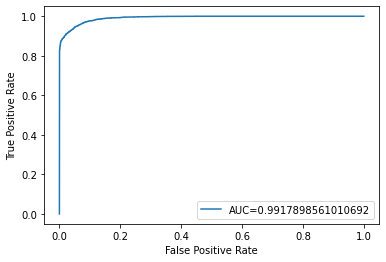

In [67]:
#ROC plot of the best model
import sklearn.metrics as metrics
#define metrics
y_pred_proba = xgb.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the ROC curve above, we can see that the AUC value for our best model is 99%

In [68]:
from sklearn.model_selection import GridSearchCV

model_best = XGBClassifier()

model_param = {
    
    'n_estimators': [100,500,550],
    'max_depth': [None],
    'learning_rate':[0.1,0.5],
    'gamma':[0,0.5,1,2,3],
    'sampling_method': ['uniform']
    }

In [69]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [70]:
#display the best parameters from the search

print("The best n_estimators is : " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best max_depth: " + str(gd_search.best_params_["max_depth"]),
     "\nThe best learning_rate: " + str(gd_search.best_params_["learning_rate"]),
      "\nThe best gamma: " + str(gd_search.best_params_["gamma"]),
     "\nThe best sampling_method: " + str(gd_search.best_params_["sampling_method"]))

The best n_estimators is : 500 
The best max_depth: None 
The best learning_rate: 0.1 
The best gamma: 0.5 
The best sampling_method: uniform


In [71]:
# train the model with the selected parameters
term_model = XGBClassifier(n_estimators  = 500, max_depth = None, learning_rate = 0.1, gamma = 0.5, sampling_method = 'uniform')
term_model.fit(X_train, y_train)
y_pred = term_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
accuracy

0.9485366508547391

In [72]:
import pickle
# save the model to disk
filename = 'term_deposit.sav'
pickle.dump(term_model, open(filename, 'wb'))

In [73]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
y_pred_test = term_model.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Prediction'])
y_pred_test.head(20)

,Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [74]:
#combining the prediction with our dataset
term_predict=pd.concat([term_deposit_test,y_pred_test],axis=1)

In [75]:
#converting the values of our subscribed back to yes and no.
term_predict['Prediction']=term_predict['Prediction'].replace({0: 'no', 1: 'yes'})

In [76]:
#display of our dataset with predictions
term_predict.head(20)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Prediction
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,no
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,no
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,no
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,no
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,no
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown,no
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown,no
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown,no
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown,yes
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure,no


In [77]:
#This returns the count of unique occurrences in our prediction column.
term_predict['Prediction'].value_counts()

no     12063
yes     1501
Name: Prediction, dtype: int64

<AxesSubplot:xlabel='Prediction', ylabel='count'>

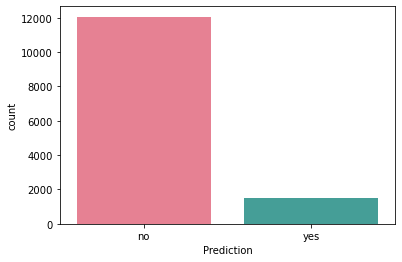

In [78]:
# This countplot shows prediction column.
sns.countplot(x='Prediction',data=term_predict,palette='husl')

### Conclusion

Xgboost Classifier is our best model because it had a lower difference between accuracy and cross validation score. The accuracy score before tuning was 0.946299 and after tuning with set parameters, the model's accuracy increased slightly to 0.948536. There was a slight improvement in the accuracy after tuning. Testing the performance of the model, we can see that 1644 clients will subscribe for term deposit.